In [20]:
import numpy as np
import matplotlib.pyplot as plt

def alpha_beta_rm1(t):
    c = np.cosh(t)
    s = np.sinh(t)
    e = np.exp(-s)
    alpha = (4 / np.sqrt(np.pi)) * c / (1+e)
    beta = 4*(np.log(1+e)+s)**2
    return alpha,beta

def calc_min_max_rm1(r_min, prec):
    t1 = 1.0
    t2 = 1.0
    while ((2 * t1 * np.exp(-t1)) > prec): t1 *= 1.1
    while ((np.sqrt(t2) * np.exp(-t2) / r_min) > prec): t2 *= 1.1
    t_min = - np.log(2 * t1)
    t_max =   np.log(t2 / (r_min * r_min))/2
    return t_min, t_max

def fill_separated_expansion(r_min,r_max,prec):
    r_0 = r_min / r_max
    t_min, t_max = calc_min_max_rm1(r_0, prec)
    h = 1 / (0.2 -  0.47 * np.log10(prec))
    n_exp = int(np.ceil((t_max - t_min) / h) + 1)
    ab = np.zeros(shape=(2,n_exp))
    for i in range(n_exp):
        t = t_min + h * i
        ab[0][i], ab[1][i] = alpha_beta_rm1(t)
    ab[0] *= h / r_max**3
    ab[1] /= r_max**2
    ab[0][0] /= 2
    ab[0][n_exp-1] /= 2
    print(n_exp)
    return ab

def separated_func(r,ab):
    val = 0
    for i in range(len(ab[0])):
        alpha = ab[0][i]
        beta = ab[1][i]
        val += alpha * np.exp(-beta * r**2)
    return val

r_min = 1.0e-5
r_max = 1.0
prec = 1.0e-5
ab = fill_separated_expansion(r_min,r_max,prec)

44


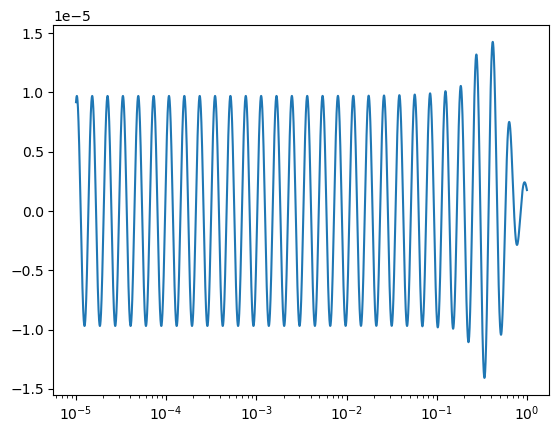

In [21]:
log_x_array = np.arange(np.log(r_min),np.log(r_max),(np.log(r_max)-np.log(r_min))/400000)
x_array = np.exp(log_x_array)
sep_array = separated_func(x_array, ab)
dif_array = 1 - separated_func(x_array, ab) * (x_array)
plt.xscale("log")
plt.plot(x_array,dif_array)